In [14]:
# Search

%matplotlib widget

import networkx as nx
import numpy as np

from matplotlib import pyplot as plt

import seaborn as sns
import matplotlib.animation

from collections import deque
from heapq import heappop, heappush

from math import *


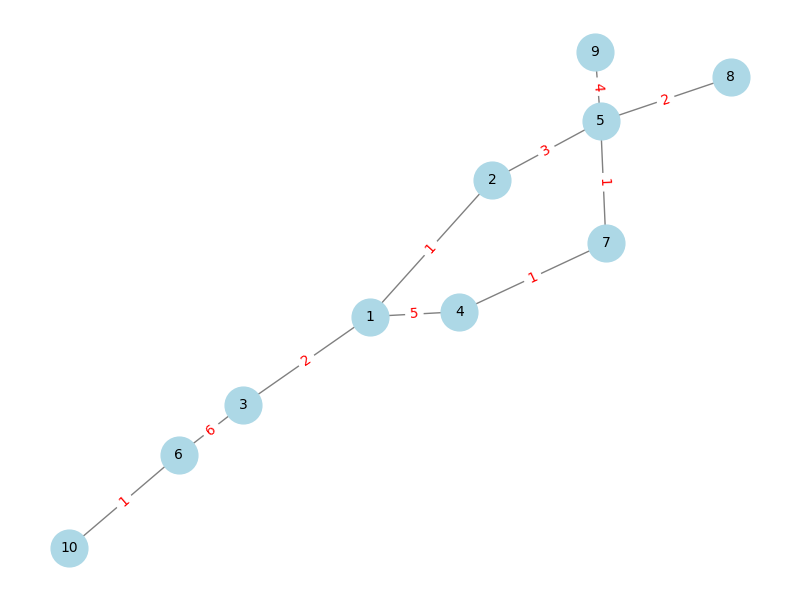

In [3]:
graph = nx.Graph()
graph.add_weighted_edges_from([('1', '2', 1), ('1', '3', 2), ('1', '4', 5), ('2', '5', 3), 
                  ('3', '6', 6), ('4', '7', 1), ('5', '8', 2), ('5', '9', 4),
                  ('6', '10', 1), ('5', '7', 1)])

# Draw the graph
# Define positions for nodes
pos = nx.spring_layout(graph)  # Generates a layout for visualization
plt.figure(figsize=(8, 6))
nx.draw(graph, 
        pos, 
        with_labels=True, 
        node_color="lightblue", 
        edge_color="gray", 
        node_size=700,
        font_size=10)

# Extract edge weights and display them
edge_labels = nx.get_edge_attributes(graph, "weight")
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=10, font_color="red")

plt.title("Graph with edge weights")
plt.show()


In [8]:
positions = {
    '1': (0, 0), '2': (1, 1), '3': (2, 1), '4': (0.5, 1),
    '5': (2, 2), '6': (3, 2), '7': (-1, 3),
    '8': (2, 4), '9': (3, 5), '10': (4, 6)
}
nx.set_node_attributes(graph, positions, "position")

In [9]:
graph['1']['2']

{'weight': 1}

In [10]:
# Stack
class Stack:
    def __init__(self):
        self.data = deque()

    def __len__(self):
        # print("calculating stack length")
        return len(self.data)
        
    def push(self, item):
        self.data.append(item)

    def pop(self):
        return self.data.pop()

In [11]:
# Queue fifo
class Queue:
    def __init__(self):
        self.data = deque()

    def __len__(self):
        # print("calculating Queue length")
        return len(self.data)

    def push(self, item):
        self.data.append(item)

    def pop(self):
        return self.data.popleft()

In [12]:
# Priority Queue fifo
class PriorityQueue:
    def __init__(self):
        self.data = []

    def __len__(self):
        # print("calculating PQ length")
        return len(self.data)

    def push(self, item):
        heappush(self.data, item)

    def pop(self):
        return heappop(self.data)

In [13]:
stack = Stack()
queue1 = Queue()
queue2 = Queue()
pq = PriorityQueue()

stack.push('1')
stack.push('2')

queue1.push('1')

queue2.push('1')
queue2.push('2')
queue2.push('3')

pq.push('1')
pq.push('2')
pq.push('3')
pq.push('4')

print(len(queue1))
print(len(queue2))
print(len(pq))

print(len(stack))

1
3
4
2


In [15]:
def unit_edge_cost(cost_to_node, weight, next_node, goal):
    return 1

def uniform_cost(cost_to_node, weight, next_node, goal):
    return cost_to_node + weight

def distance(from_node, to_node):
    from_x, from_y = graph.nodes[from_node]['position']
    to_x, to_y = graph.nodes[to_node]['position']
    return sqrt((to_x - from_x) ** 2 + (to_y - from_y)**2)

def cost_with_heuristic(cost_to_node, weight, next_node, goal):
    return cost_to_node + weight + distance(next_node, goal)

In [8]:
def search(graph, start, goal, queue, node_cost):
    visited = set()    
    queue.push((0, start, [start]))    
    while len(queue) > 0:
        cost, node, path = queue.pop()
        print(node, path)
        if node == goal:
            return cost, path
        
        visited.add(node)

        for next_node, attributes in graph[node].items():
            if next_node not in visited:
                next_cost = node_cost(cost, attributes['weight'], next_node, goal)
                queue.push((next_cost, next_node, path + [next_node]))

In [17]:
search(graph, '1', '10', Queue())

1 ['1']
2 ['1', '2']
3 ['1', '3']
4 ['1', '4']
5 ['1', '2', '5']
6 ['1', '3', '6']
7 ['1', '4', '7']
8 ['1', '2', '5', '8']
9 ['1', '2', '5', '9']
7 ['1', '2', '5', '7']
10 ['1', '3', '6', '10']


(9, ['1', '3', '6', '10'])

In [18]:
def iterate_search(graph, start, goal, queue):
    visited = set()    
    queue.push((0, start, [start]))    
    while len(queue) > 0:
        cost, node, path = queue.pop()
        
        yield cost, path
        if node == goal:
            return cost, path
        
        visited.add(node)
        for next_node, attributes in graph[node].items():
            if next_node not in visited:
                next_cost = attributes['weight'] + cost
                queue.push((next_cost, next_node, path + [next_node]))

In [19]:
for cost, path in iterate_search(graph, '7', '10', Stack()):
    print(cost, path)

0 ['7']
1 ['7', '5']
5 ['7', '5', '9']
3 ['7', '5', '8']
4 ['7', '5', '2']
5 ['7', '5', '2', '1']
10 ['7', '5', '2', '1', '4']
7 ['7', '5', '2', '1', '3']
13 ['7', '5', '2', '1', '3', '6']
14 ['7', '5', '2', '1', '3', '6', '10']


In [11]:
paths = [p[1] for p in iterate_search(graph, '1', '10', PriorityQueue())]
print(len(paths))
paths

11


[['1'],
 ['1', '2'],
 ['1', '3'],
 ['1', '2', '5'],
 ['1', '4'],
 ['1', '2', '5', '7'],
 ['1', '4', '7'],
 ['1', '2', '5', '8'],
 ['1', '3', '6'],
 ['1', '2', '5', '9'],
 ['1', '3', '6', '10']]

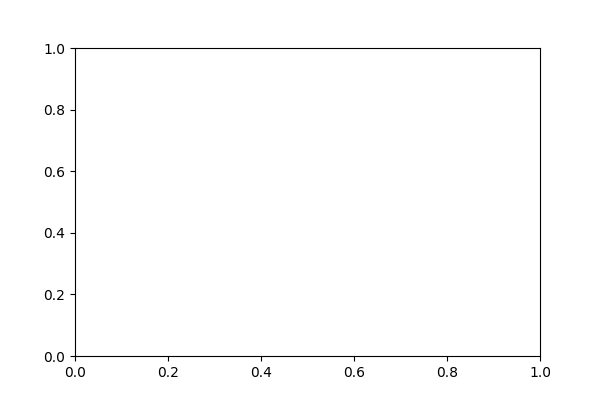

In [12]:
idx_colors = sns.cubehelix_palette(len(paths), start=.5, rot=-.75)[::-1]
idx_weights = [3,2,1]

# Build plot
fig, ax = plt.subplots(figsize=(6,4))

def update_anim(i):
    ax.clear()
    path = paths[i]

    # Background nodes
    nx.draw_networkx_edges(graph, pos, ax=ax, edge_color="gray")
    null_nodes = nx.draw_networkx_nodes(graph, pos, nodelist=set(graph.nodes()) - set(path), node_color="white", ax=ax)
    null_nodes.set_edgecolor("gray")
    nx.draw_networkx_labels(graph, pos, font_color="black", ax=ax)

    edge_labels = nx.get_edge_attributes(graph, "weight")
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=10, font_color="red")


    # Query nodes
    query_nodes = nx.draw_networkx_nodes(graph, pos=pos, nodelist=path, node_color=idx_colors[:len(path)], ax=ax)
    query_nodes.set_edgecolor("white")
    nx.draw_networkx_labels(graph, pos, labels=dict(zip(path,path)),  font_color="white", ax=ax)
    edgelist = [path[k:k+2] for k in range(len(path) - 1)]
    nx.draw_networkx_edges(graph, pos, edgelist=edgelist, width=3, ax=ax)

    # Scale plot ax
    ax.set_title("Frame %d:    "%(i+1) +  " - ".join(path), fontweight="bold")
    ax.set_xticks([])
    ax.set_yticks([])


ani = matplotlib.animation.FuncAnimation(fig, update_anim, frames=len(paths), interval=2000, repeat=True)
# plt.show()


In [13]:
# # Create Graph
# np.random.seed(2)
# G = nx.cubical_graph()
# G = nx.relabel_nodes(G, {0:"O", 1:"X", 2:"XZ", 3:"Z", 4:"Y", 5:"YZ", 6: "XYZ", 7:"XY"})
# pos = nx.spring_layout(G)

# # Sequence of letters
# sequence_of_letters = "".join(['X', 'Y', 'Z', 'Y', 'Y', 'Z'])
# idx_colors = sns.cubehelix_palette(5, start=.5, rot=-.75)[::-1]
# idx_weights = [3,2,1]

# # Build plot
# fig, ax = plt.subplots(figsize=(6,4))


# def update(num):
#     ax.clear()
#     i = num // 3
#     j = num % 3 + 1
#     triad = sequence_of_letters[i:i+3]
#     path = ["O"] + ["".join(sorted(set(triad[:k + 1]))) for k in range(j)]

#     # Background nodes
#     nx.draw_networkx_edges(G, pos=pos, ax=ax, edge_color="gray")
#     null_nodes = nx.draw_networkx_nodes(G, pos=pos, nodelist=set(G.nodes()) - set(path), node_color="white",  ax=ax)
#     null_nodes.set_edgecolor("black")

#     # Query nodes
#     query_nodes = nx.draw_networkx_nodes(G, pos=pos, nodelist=path, node_color=idx_colors[:len(path)], ax=ax)
#     query_nodes.set_edgecolor("white")
#     nx.draw_networkx_labels(G, pos=pos, labels=dict(zip(path,path)),  font_color="white", ax=ax)
#     edgelist = [path[k:k+2] for k in range(len(path) - 1)]
#     nx.draw_networkx_edges(G, pos=pos, edgelist=edgelist, width=idx_weights[:len(path)], ax=ax)

#     # Scale plot ax
#     ax.set_title("Frame %d:    "%(num+1) +  " - ".join(path), fontweight="bold")
#     ax.set_xticks([])
#     ax.set_yticks([])

# ani = matplotlib.animation.FuncAnimation(fig, update, frames=6, interval=1000, repeat=True)
# plt.show()


In [14]:
G = nx.Graph({
    '1': ['2', '3', '4'],
    '2': ['5'],
    '3': ['6'],
    '4': ['7'],
    '5': ['8', '9'],
    '6': ['10'],
    '7': [],
    '8': [],
    '9': [],
    '10': []
})

# BFS(G, '5')

G.edges(['5'])
nx.draw(G, with_labels=True)